# 한국 부동산 데이터 시각 경진대회

https://machinelearningmastery.com/time-series-data-visualization-with-python/

## Get Jupyter ready

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font',family='Malgun Gothic') 
plt.rc('axes',unicode_minus=False)
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

## Functions

### Data type and Index change Function

<div class="alert alert-block alert-warning">
    <b>Findings: </b> 모든 데이터가 시간과 float타입의 데이터로 구성되어 있어 함수를 통해 일괄적으로 적용 가능.날짜가 object타입으로 되어있어 이를 datetime으로 변경할 수 있도록 함수을 만듬</div>

In [3]:
# 데이터의 날짜컬럼을 지수로 변경해주는 함수
def change_datetime(data):
    datetime_series=pd.to_datetime(data['Unnamed: 0'])
    datetime_index =pd.DatetimeIndex(datetime_series.values)
    data=data.set_index(datetime_index)
    data.drop(columns='Unnamed: 0',inplace=True)
    return data

### Plotting Functions

<div class="alert alert-block alert-warning">
    <b>Findings: </b> 데이터의 구성형태가 동일하므로 시계열 시각화도 함수를 통해 적용</div>

In [4]:
# # 데이터의 모든 컬럼 데이터를 한 graph에 plot
def mul_viz(data,title,div=False):
    plt.figure(figsize=(15,7))
    if div==False:
        plt.plot(data)
        plt.legend(data.columns, bbox_to_anchor=(1.005, 1), loc='upper left')
        
    else:
        x = int(input("컬럼분리::"))
        print ("입력한 컬럼은::", x)
        plt.subplot(1,2,1)
        plt.plot(data[1:x])
        plt.subplot(1,2,2)
        plt.plot(data[x:])
        plt.legend(data.columns, bbox_to_anchor=(1.005, 1), loc='upper left')
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

In [68]:
# 데이터의 각각의 컬럼 데이터를 plot 
def indiv_viz(data,figsize,title):
    mx=max(data.max())
    mn=min(data.min())
    plt.figure(figsize=figsize)
    nr=data.shape[1]//2
    for i in enumerate(data):
        plt.subplot(nr,2,i[0]+1)
        plt.plot(data.index,data[i[1]])
        plt.ylim(mn,mx) 
        plt.title(i[1])
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)

## Data Analysis

### 지역별 지가 변동률

In [6]:
# 데이터 로드
region=pd.read_csv('data/realestate/지역별_지가변동률.csv',parse_dates=True)
region.shape

(194, 19)

In [7]:
# 데이터 타입 확인
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  194 non-null    object 
 1   전국[%]       194 non-null    float64
 2   서울[%]       194 non-null    float64
 3   부산[%]       194 non-null    float64
 4   대구[%]       194 non-null    float64
 5   인천[%]       194 non-null    float64
 6   광주[%]       194 non-null    float64
 7   대전[%]       194 non-null    float64
 8   울산[%]       194 non-null    float64
 9   세종[%]       104 non-null    float64
 10  경기[%]       194 non-null    float64
 11  강원[%]       194 non-null    float64
 12  충북[%]       194 non-null    float64
 13  충남[%]       194 non-null    float64
 14  전북[%]       194 non-null    float64
 15  전남[%]       194 non-null    float64
 16  경북[%]       194 non-null    float64
 17  경남[%]       194 non-null    float64
 18  제주[%]       194 non-null    float64
dtypes: float64(18), object(1)
mem

In [8]:
# 날짜를 object에서 datetime타입으로 변경, 지수로 날짜데이터를 사용
region=change_datetime(region)

In [9]:
region.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 194 entries, 2005-01-01 to 2021-02-01
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   전국[%]   194 non-null    float64
 1   서울[%]   194 non-null    float64
 2   부산[%]   194 non-null    float64
 3   대구[%]   194 non-null    float64
 4   인천[%]   194 non-null    float64
 5   광주[%]   194 non-null    float64
 6   대전[%]   194 non-null    float64
 7   울산[%]   194 non-null    float64
 8   세종[%]   104 non-null    float64
 9   경기[%]   194 non-null    float64
 10  강원[%]   194 non-null    float64
 11  충북[%]   194 non-null    float64
 12  충남[%]   194 non-null    float64
 13  전북[%]   194 non-null    float64
 14  전남[%]   194 non-null    float64
 15  경북[%]   194 non-null    float64
 16  경남[%]   194 non-null    float64
 17  제주[%]   194 non-null    float64
dtypes: float64(18)
memory usage: 28.8 KB


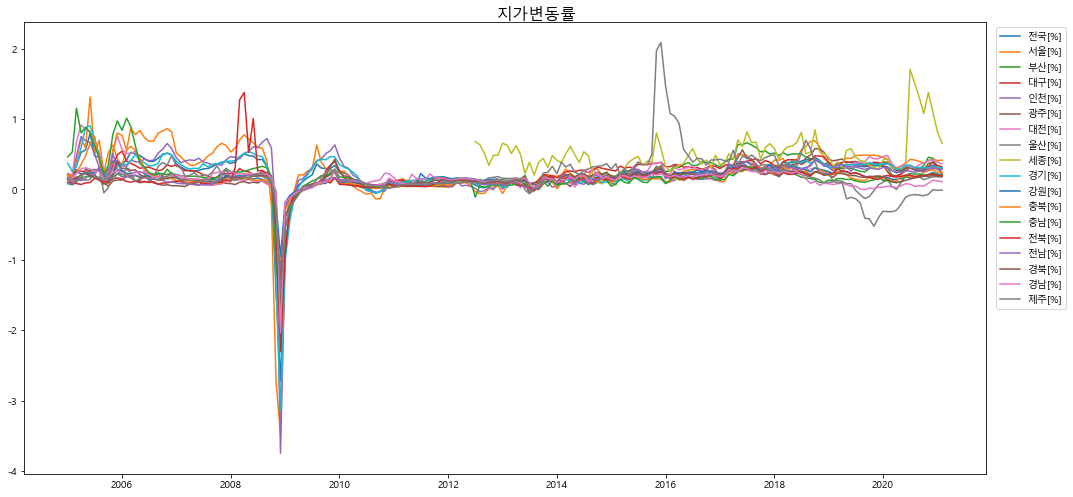

In [10]:
mul_viz(region,'지가변동률')

* 모든 지역의 지가변동률을 하나의 그래프로 표현하면 어떤 지역이 다른 특징을 지니고 변동하였는지 알기 어려우므로 각 지역별 변동률을 알아볼수 있도록 개별 그래프로 그림

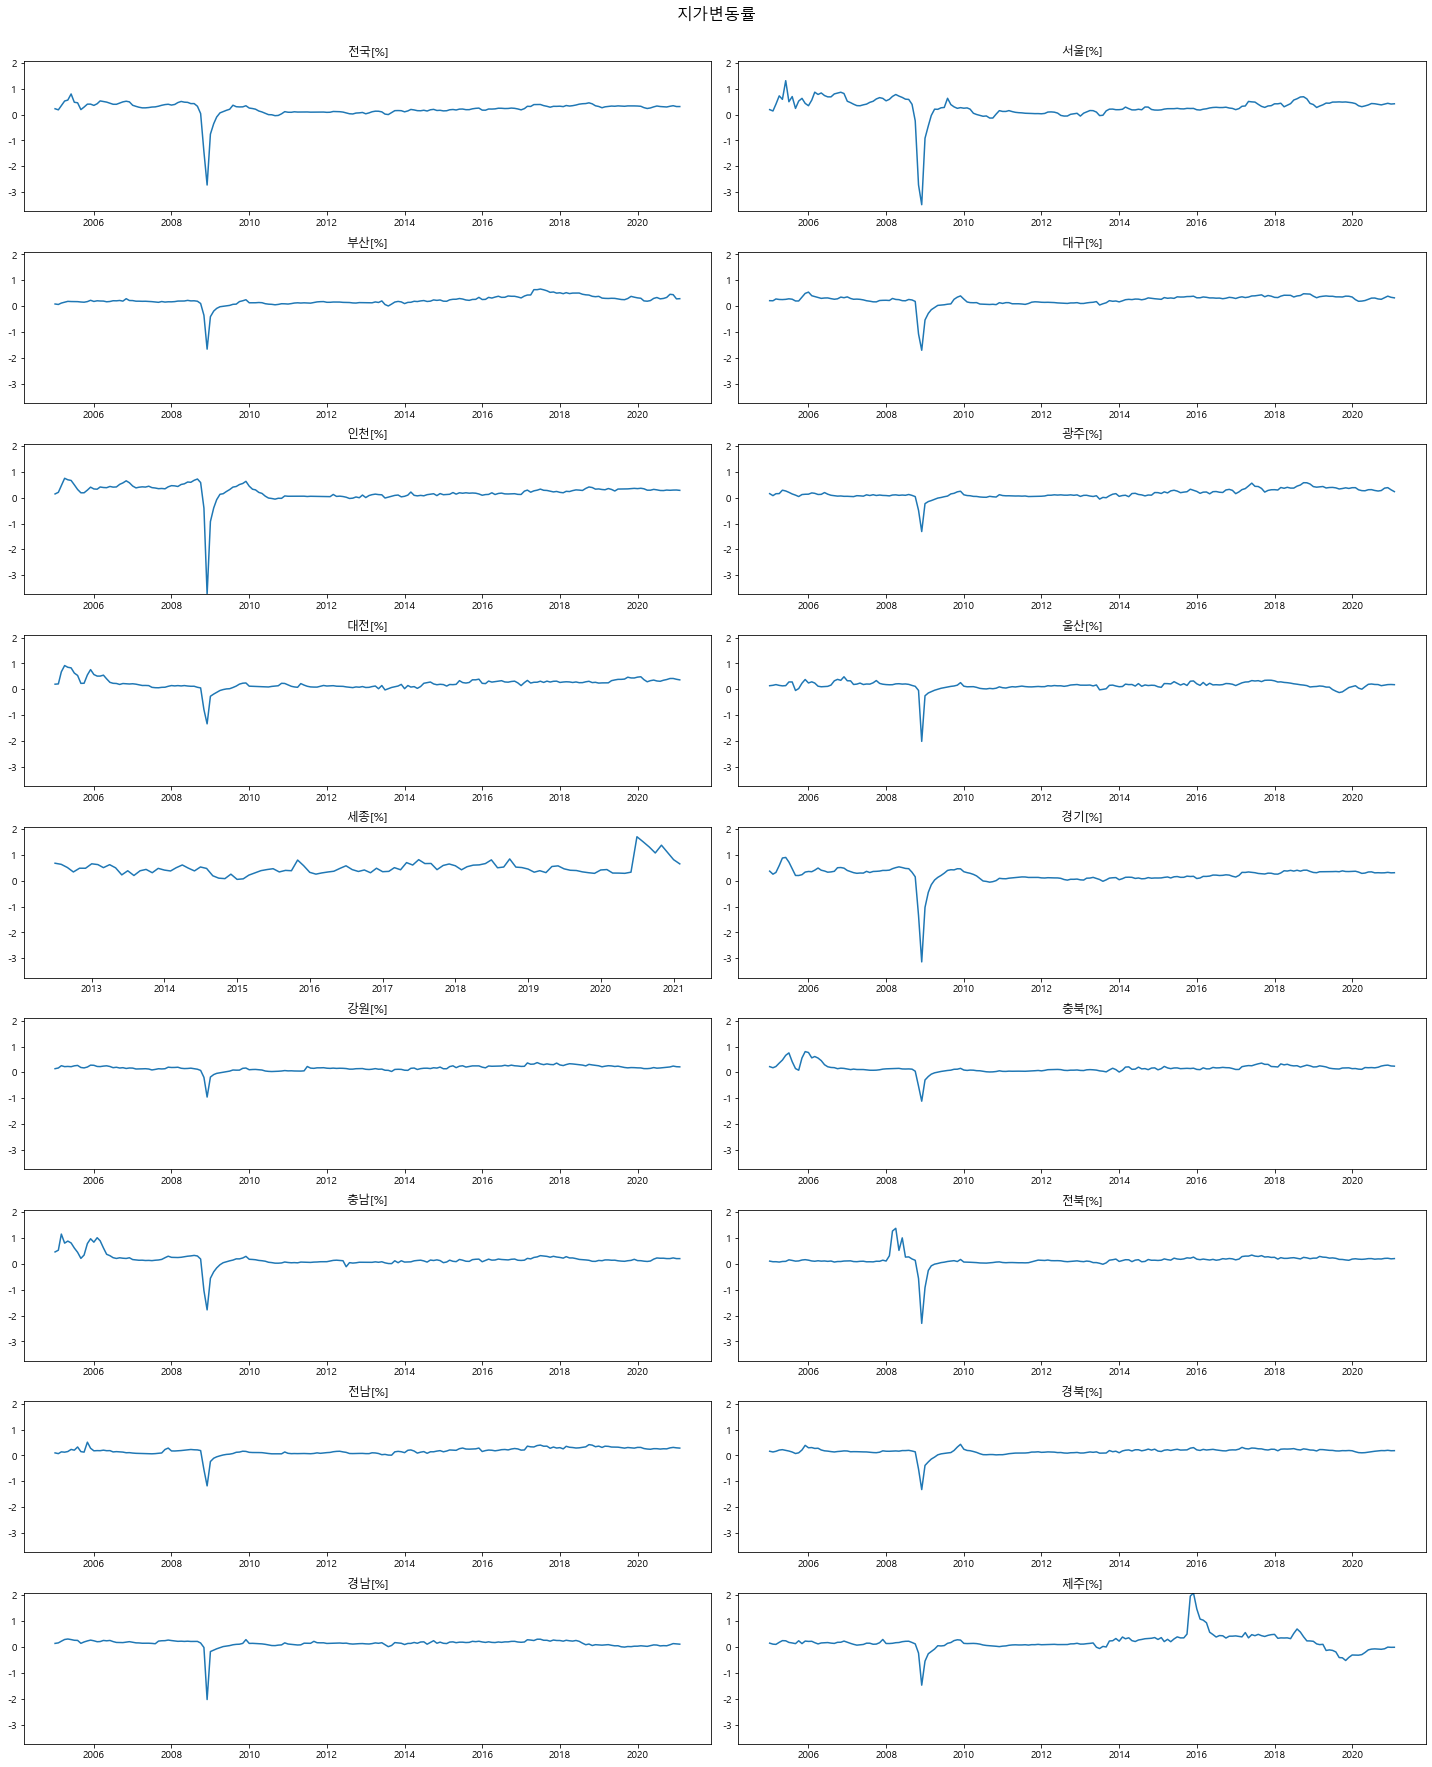

In [63]:
indiv_viz(region,(20,25),'지가변동률')

<div class="alert alert-block alert-info">
<b>Insight:</b> <br> 지가 변동폭을 다르지만 대부분의 지역이 비슷한 형태를 보이고 있으나 제주와 세종 지역은 다른 지역들과는 다른 지가 변동률 등락을 보이고 있다.  또한 수도권 지역인 서울, 경기, 인천의 지가 변동률 등락은 다른 지역에 비해 큰 변동을 보이고 있음을 알 수 있다. 제주 세종지역의 가격 변동이 왜 다른 지는 지가 변동률 데이터로만으로 알기 어려우므로 추가적인 데이터가 필요할 것으로 보인다. 
</div>

### 건축허가현황

In [12]:
# 데이터 로드
const=pd.read_csv('data/realestate/건축허가현황.csv',parse_dates=True)
const.shape

(247, 23)

In [13]:
const.head()

,Unnamed: 0,연면적-철근·철골조[㎡],연면적-조적조[㎡],연면적-목조[㎡],연면적-기타(자재별)[㎡],연면적-주거용[㎡],연면적-상업용[㎡],연면적-공업용[㎡],연면적-교육및사회용[㎡],연면적-기타(용도별)[㎡],연면적-자재별[㎡],연면적-용도별[㎡],동수-철근·철골조[동수],동수-조적조[동수],동수-목조[동수],동수-기타(자재별)[동수],동수-주거용[동수],동수-상업용[동수],동수-공업용[동수],동수-교육및사회용[동수],동수-기타(용도별)[동수],동수-자재별[동수],동수-용도별[동수]
0,2000-08-01,3898712.0,122063.0,5229.0,287185.0,1812355.0,1088979.0,687577.0,0.0,724278.0,4313189.0,4313189.0,4319.0,1216.0,58.0,1078.0,2905.0,2008.0,741.0,0.0,1017.0,6671.0,6671.0
1,2000-09-01,3055754.0,113586.0,5918.0,236449.0,1273430.0,1014900.0,702592.0,0.0,420785.0,3411707.0,3411707.0,3910.0,1128.0,70.0,793.0,2653.0,1756.0,652.0,0.0,840.0,5901.0,5901.0
2,2000-10-01,4104565.0,134648.0,8006.0,314620.0,1908535.0,1095874.0,1011477.0,0.0,545953.0,4561839.0,4561839.0,4970.0,1290.0,61.0,1183.0,3246.0,2264.0,874.0,0.0,1120.0,7504.0,7504.0
3,2000-11-01,4337103.0,108212.0,7727.0,283128.0,2415543.0,1164943.0,613744.0,0.0,541940.0,4736170.0,4736170.0,4497.0,1128.0,62.0,1088.0,2801.0,2050.0,816.0,0.0,1108.0,6775.0,6775.0
4,2000-12-01,6027008.0,161879.0,26079.0,453178.0,3450325.0,1412322.0,1069299.0,0.0,736198.0,6668144.0,6668144.0,3581.0,941.0,70.0,986.0,2080.0,1619.0,748.0,0.0,1131.0,5578.0,5578.0


In [14]:
# 데이터 타입 확인
const.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      247 non-null    object 
 1   연면적-철근·철골조[㎡]   247 non-null    float64
 2   연면적-조적조[㎡]      247 non-null    float64
 3   연면적-목조[㎡]       247 non-null    float64
 4   연면적-기타(자재별)[㎡]  247 non-null    float64
 5   연면적-주거용[㎡]      247 non-null    float64
 6   연면적-상업용[㎡]      247 non-null    float64
 7   연면적-공업용[㎡]      247 non-null    float64
 8   연면적-교육및사회용[㎡]   247 non-null    float64
 9   연면적-기타(용도별)[㎡]  247 non-null    float64
 10  연면적-자재별[㎡]      247 non-null    float64
 11  연면적-용도별[㎡]      247 non-null    float64
 12  동수-철근·철골조[동수]   247 non-null    float64
 13  동수-조적조[동수]      247 non-null    float64
 14  동수-목조[동수]       247 non-null    float64
 15  동수-기타(자재별)[동수]  247 non-null    float64
 16  동수-주거용[동수]      247 non-null    float64
 17  동수-상업용[동수]      247 non-null    flo

In [15]:
const=change_datetime(const)

In [16]:
const.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 247 entries, 2000-08-01 to 2021-02-01
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   연면적-철근·철골조[㎡]   247 non-null    float64
 1   연면적-조적조[㎡]      247 non-null    float64
 2   연면적-목조[㎡]       247 non-null    float64
 3   연면적-기타(자재별)[㎡]  247 non-null    float64
 4   연면적-주거용[㎡]      247 non-null    float64
 5   연면적-상업용[㎡]      247 non-null    float64
 6   연면적-공업용[㎡]      247 non-null    float64
 7   연면적-교육및사회용[㎡]   247 non-null    float64
 8   연면적-기타(용도별)[㎡]  247 non-null    float64
 9   연면적-자재별[㎡]      247 non-null    float64
 10  연면적-용도별[㎡]      247 non-null    float64
 11  동수-철근·철골조[동수]   247 non-null    float64
 12  동수-조적조[동수]      247 non-null    float64
 13  동수-목조[동수]       247 non-null    float64
 14  동수-기타(자재별)[동수]  247 non-null    float64
 15  동수-주거용[동수]      247 non-null    float64
 16  동수-상업용[동수]      247 non-null    float64
 17  동수-공업용[동수]      

In [17]:
const.describe()

,연면적-철근·철골조[㎡],연면적-조적조[㎡],연면적-목조[㎡],연면적-기타(자재별)[㎡],연면적-주거용[㎡],연면적-상업용[㎡],연면적-공업용[㎡],연면적-교육및사회용[㎡],연면적-기타(용도별)[㎡],연면적-자재별[㎡],연면적-용도별[㎡],동수-철근·철골조[동수],동수-조적조[동수],동수-목조[동수],동수-기타(자재별)[동수],동수-주거용[동수],동수-상업용[동수],동수-공업용[동수],동수-교육및사회용[동수],동수-기타(용도별)[동수],동수-자재별[동수],동수-용도별[동수]
count,2.470000e+02,247.000000,247.000000,247.000000,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,8.362954e+06,84743.736842,59675.412955,31433.716599,3.152595e+06,2.358693e+06,1.191745e+06,5.593368e+05,1.276437e+06,8.538807e+06,8.538807e+06,12786.036437,1035.979757,665.995951,150.817814,5942.777328,3813.927126,1542.226721,545.267206,2794.631579,14638.829960,14638.829960
std,2.619835e+06,50508.039768,35648.267938,85536.803237,1.391815e+06,8.281977e+05,2.878361e+05,2.395251e+05,6.169232e+05,2.620451e+06,2.620451e+06,3836.123965,479.589522,408.816053,233.052201,2364.881436,931.670365,390.416930,200.393194,1253.338393,4180.488495,4180.488495
min,2.304948e+06,4943.000000,3249.000000,0.000000,6.500930e+05,6.976370e+05,4.963010e+05,0.000000e+00,2.801500e+05,2.580317e+06,2.580317e+06,2214.000000,155.000000,30.000000,0.000000,1194.000000,1020.000000,498.000000,0.000000,500.000000,3212.000000,3212.000000
25%,6.444906e+06,47350.500000,23822.500000,2175.000000,2.179965e+06,1.782772e+06,9.935025e+05,4.682655e+05,8.327855e+05,6.642028e+06,6.642028e+06,9947.000000,627.500000,201.500000,30.500000,4081.500000,3171.500000,1257.500000,459.000000,1831.000000,11177.500000,11177.500000
50%,8.051225e+06,78488.000000,62375.000000,4076.000000,2.996436e+06,2.186263e+06,1.209878e+06,5.504920e+05,1.122976e+06,8.181177e+06,8.181177e+06,12985.000000,1041.000000,725.000000,71.000000,5860.000000,3898.000000,1580.000000,550.000000,2722.000000,14758.000000,14758.000000
75%,1.010154e+07,115636.500000,86430.000000,12500.500000,3.749403e+06,2.855512e+06,1.383268e+06,6.613760e+05,1.591520e+06,1.029602e+07,1.029602e+07,15689.500000,1372.500000,969.500000,135.000000,7421.500000,4538.000000,1821.500000,675.000000,3366.500000,17886.500000,17886.500000
max,1.793928e+07,262844.000000,138335.000000,713808.000000,9.279701e+06,6.006266e+06,2.149255e+06,1.937855e+06,3.141140e+06,1.813055e+07,1.813055e+07,20501.000000,2426.000000,1523.000000,1183.000000,12013.000000,6129.000000,2402.000000,957.000000,6686.000000,22840.000000,22840.000000


컬럼분리::11
입력한 컬럼은:: 11


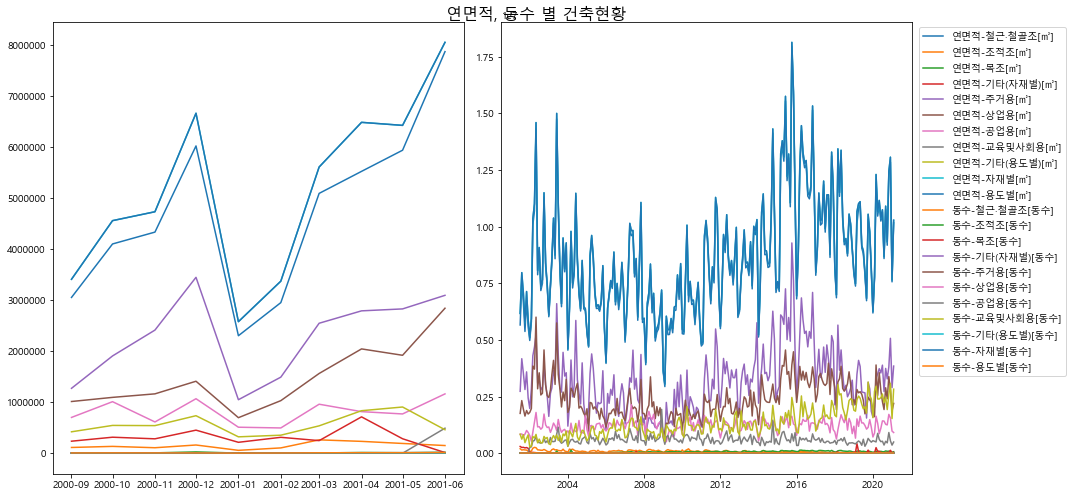

In [18]:
mul_viz(const,'연면적, 동수 별 건축현황',True)

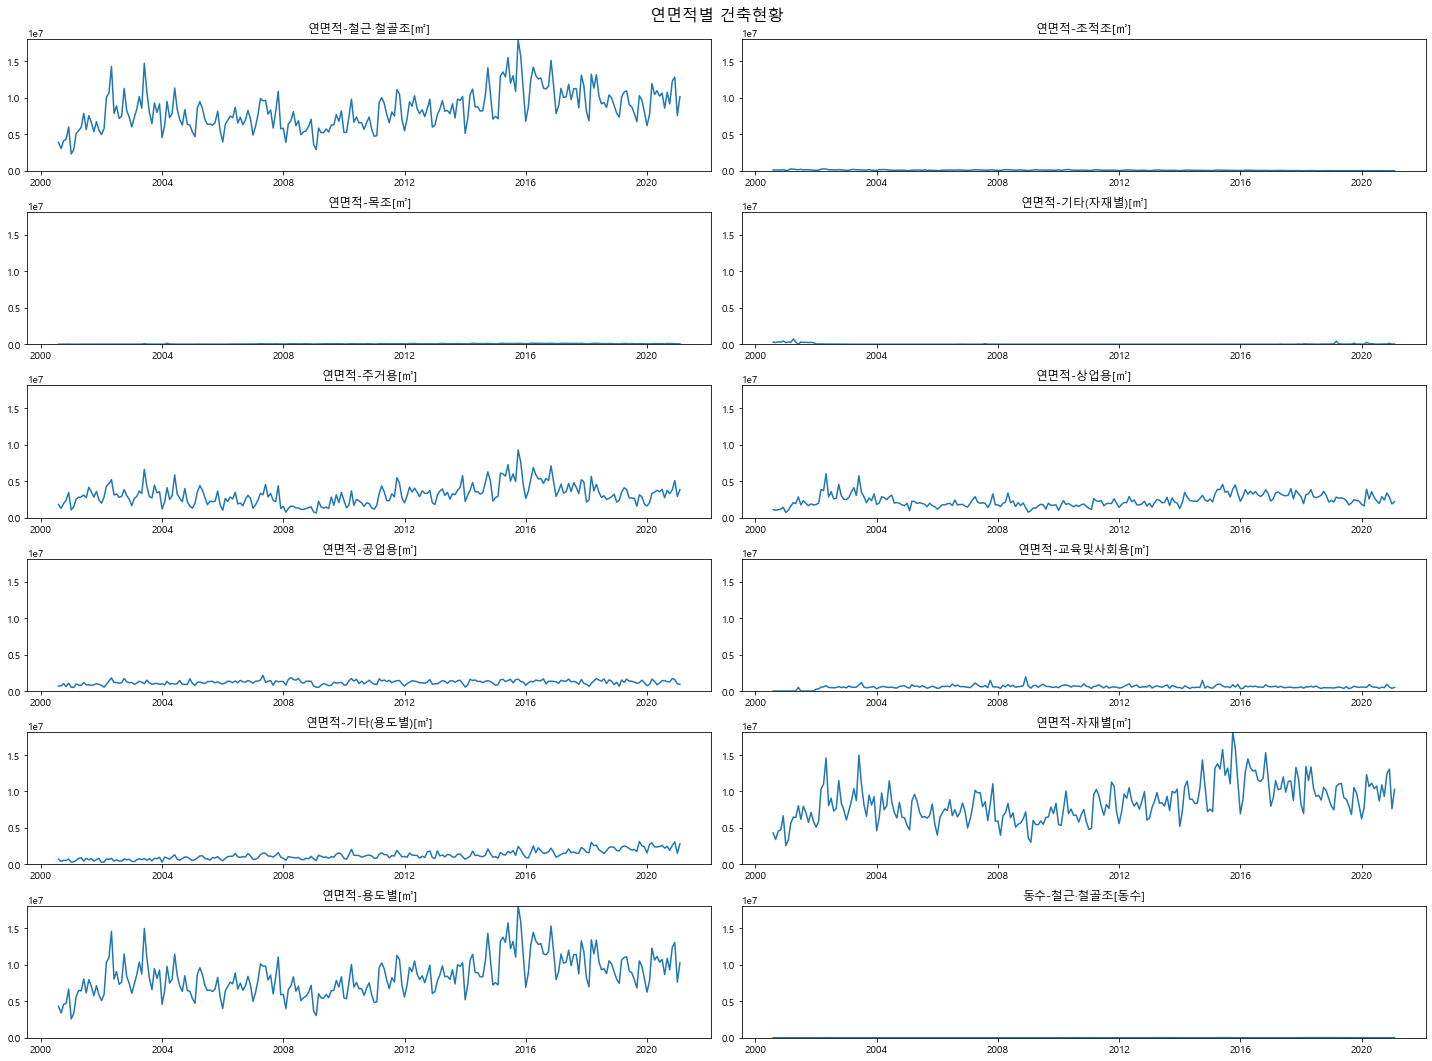

In [71]:
indiv_viz(const.iloc[:,:12],(20,15),'연면적별 건축현황')

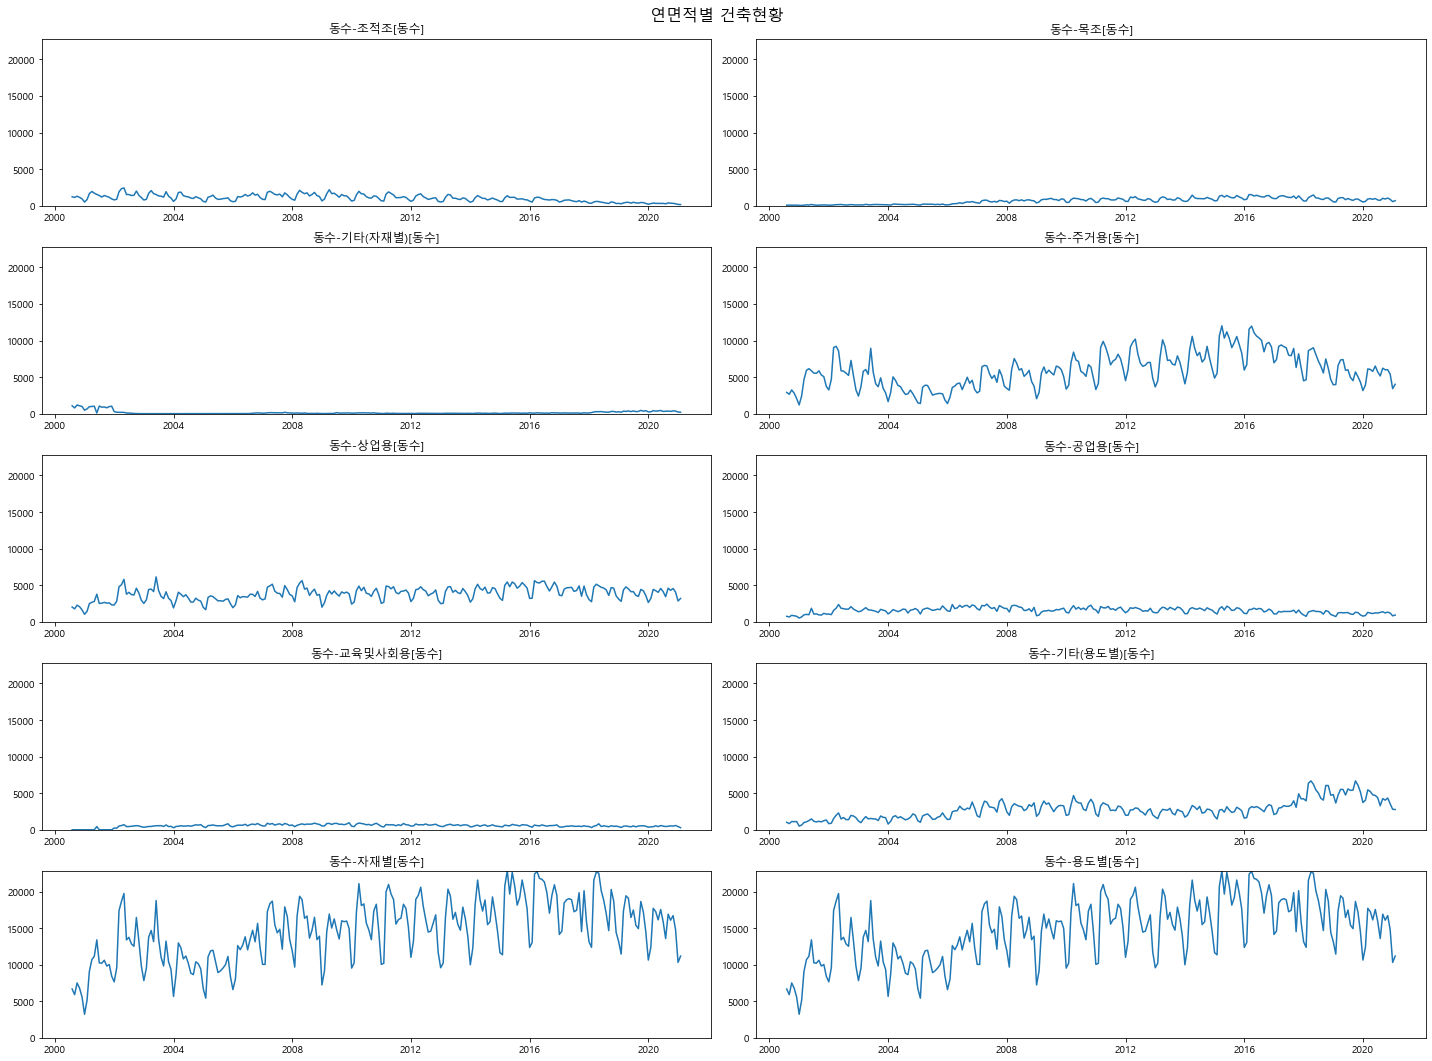

In [72]:
indiv_viz(const.iloc[:,12:],(20,15),'연면적별 건축현황')

### 국내건설수주액

In [20]:
domestic=pd.read_csv('data/realestate/국내건설수주액.csv',parse_dates=True)
domestic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     542 non-null    object 
 1   총수주액[백만원]      542 non-null    float64
 2   공공부문[백만원]      542 non-null    float64
 3   중앙정부[백만원]      542 non-null    float64
 4   지방자치단체[백만원]    542 non-null    float64
 5   공기업[백만원]       542 non-null    float64
 6   기타공공단체[백만원]    542 non-null    float64
 7   민간부문[백만원]      542 non-null    float64
 8   제조업[백만원]       542 non-null    float64
 9   비제조업[백만원]      542 non-null    float64
 10  국내외국기관[백만원]    516 non-null    float64
 11  민자[백만원]        314 non-null    float64
 12  건축[백만원]        542 non-null    float64
 13  주택[백만원]        542 non-null    float64
 14  사무실 및 점포[백만원]  542 non-null    float64
 15  공장 및 창고[백만원]   542 non-null    float64
 16  관공서[백만원]       542 non-null    float64
 17  기타[백만원]        542 non-null    float64
 18  토목[백만원]   

In [21]:
domestic=change_datetime(domestic)
domestic.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 542 entries, 1976-01-01 to 2021-02-01
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   총수주액[백만원]      542 non-null    float64
 1   공공부문[백만원]      542 non-null    float64
 2   중앙정부[백만원]      542 non-null    float64
 3   지방자치단체[백만원]    542 non-null    float64
 4   공기업[백만원]       542 non-null    float64
 5   기타공공단체[백만원]    542 non-null    float64
 6   민간부문[백만원]      542 non-null    float64
 7   제조업[백만원]       542 non-null    float64
 8   비제조업[백만원]      542 non-null    float64
 9   국내외국기관[백만원]    516 non-null    float64
 10  민자[백만원]        314 non-null    float64
 11  건축[백만원]        542 non-null    float64
 12  주택[백만원]        542 non-null    float64
 13  사무실 및 점포[백만원]  542 non-null    float64
 14  공장 및 창고[백만원]   542 non-null    float64
 15  관공서[백만원]       542 non-null    float64
 16  기타[백만원]        542 non-null    float64
 17  토목[백만원]        542 non-null    floa

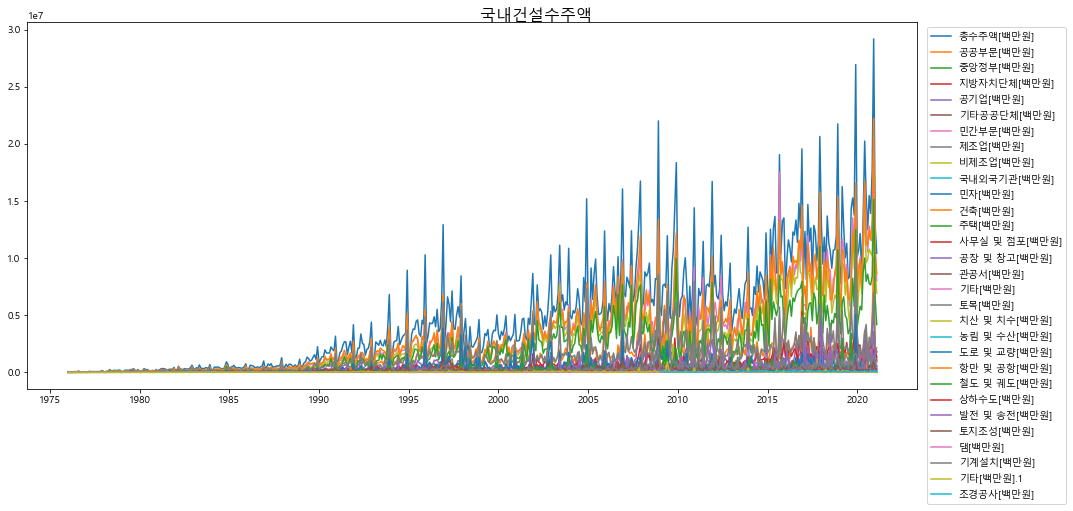

In [22]:
mul_viz(domestic,'국내건설수주액')

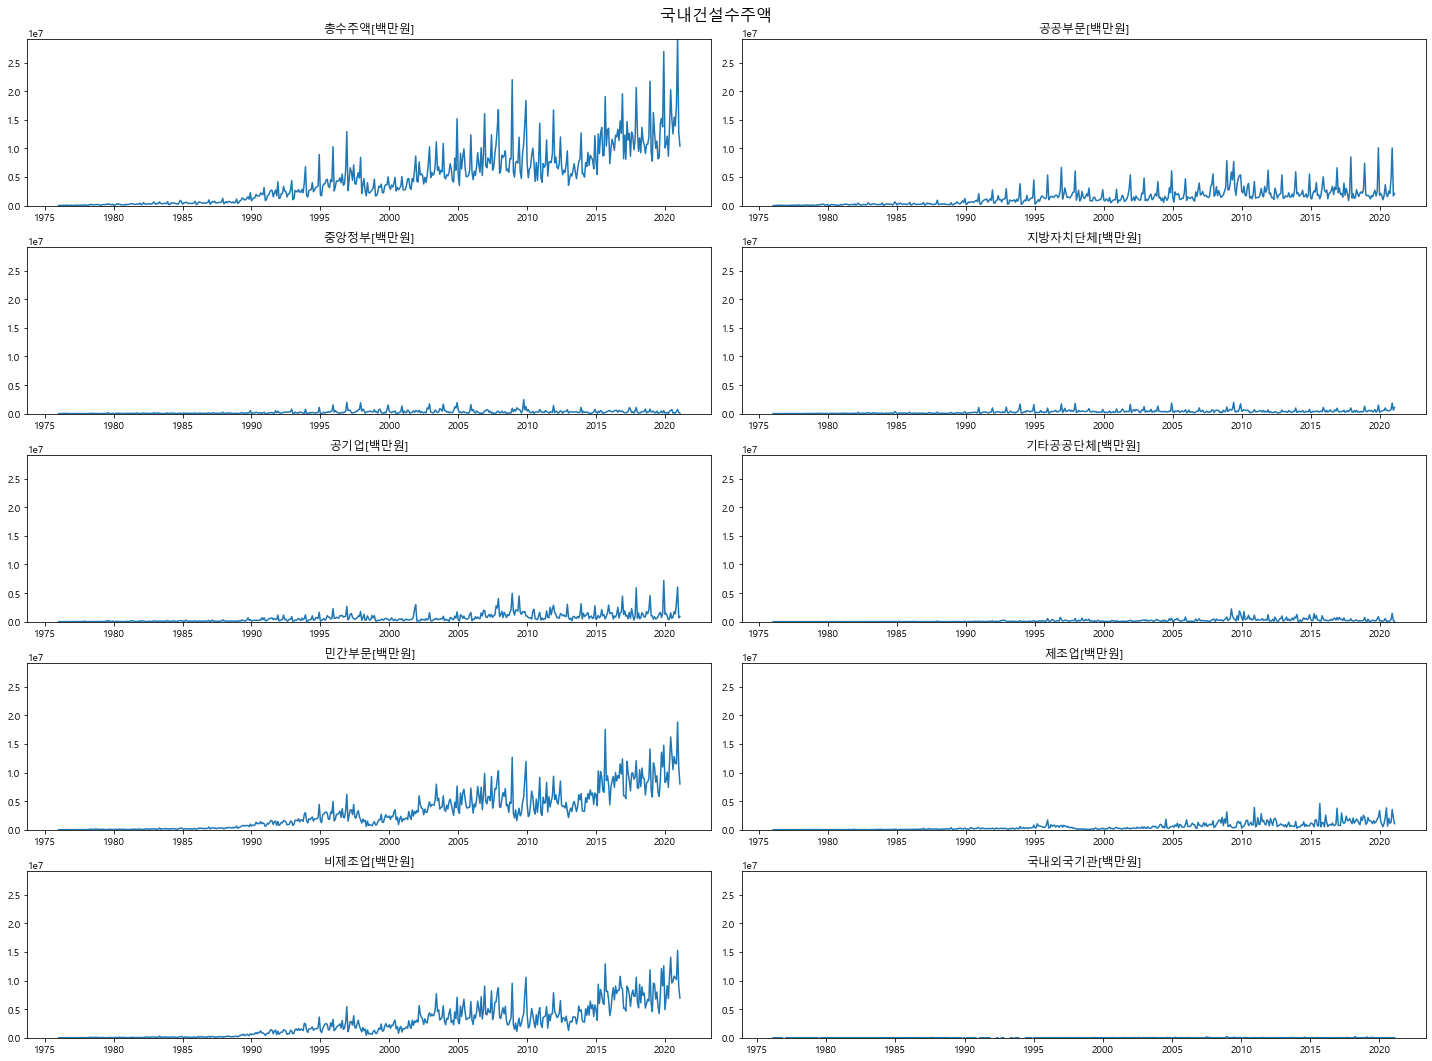

In [78]:
indiv_viz(domestic.iloc[:,:10],(20,15),'국내건설수주액')

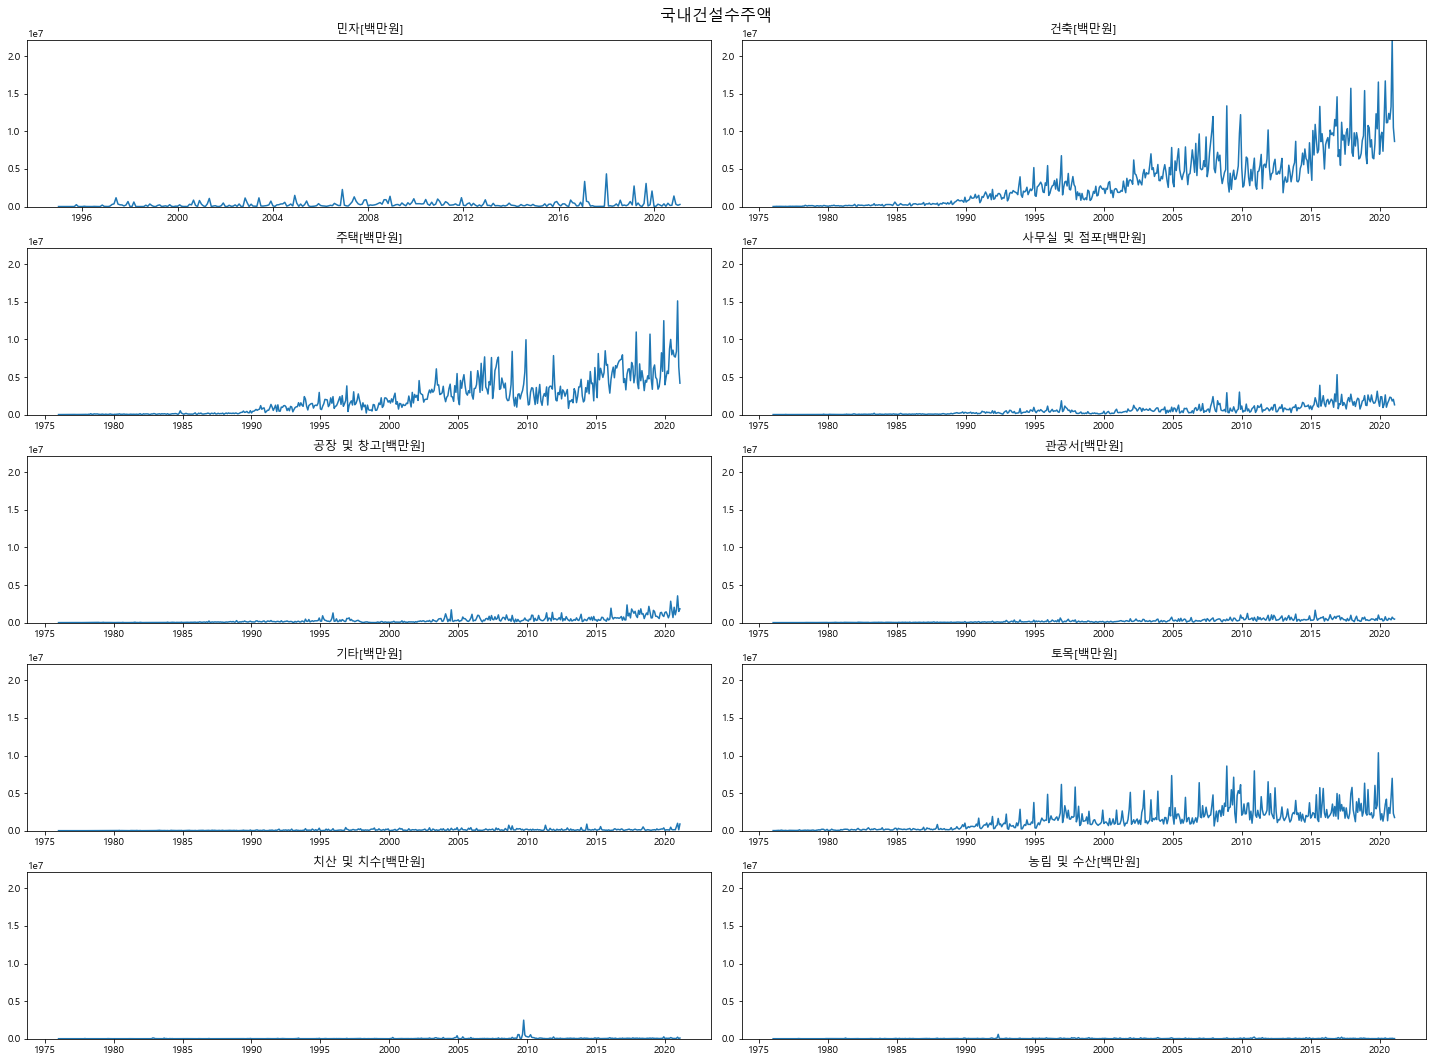

In [79]:
indiv_viz(domestic.iloc[:,10:20],(20,15),'국내건설수주액')

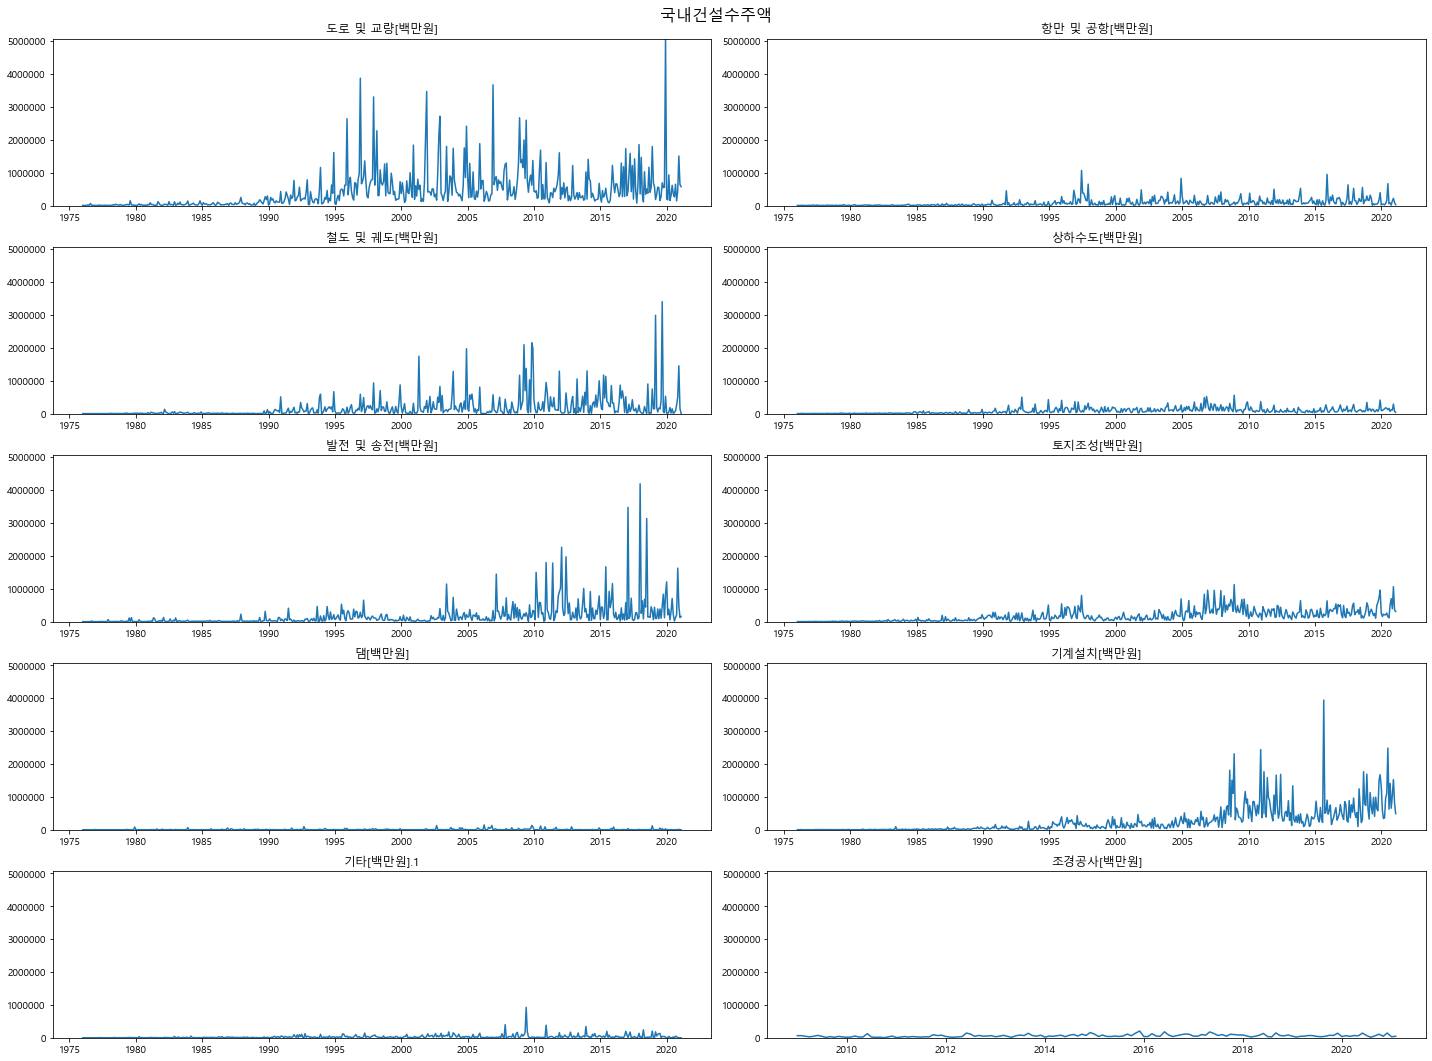

In [80]:
indiv_viz(domestic.iloc[:,20:],(20,15),'국내건설수주액')

### 미분양주택현황

In [24]:
unsold=pd.read_csv('data/realestate/미분양주택현황.csv',parse_dates=True) 
unsold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  170 non-null    object 
 1   전국[호]       170 non-null    float64
 2   서울[호]       170 non-null    float64
 3   부산[호]       170 non-null    float64
 4   대구[호]       170 non-null    float64
 5   인천[호]       170 non-null    float64
 6   광주[호]       170 non-null    float64
 7   대전[호]       170 non-null    float64
 8   울산[호]       170 non-null    float64
 9   경기[호]       170 non-null    float64
 10  강원[호]       170 non-null    float64
 11  충북[호]       170 non-null    float64
 12  충남[호]       170 non-null    float64
 13  전북[호]       170 non-null    float64
 14  전남[호]       170 non-null    float64
 15  경북[호]       170 non-null    float64
 16  경남[호]       170 non-null    float64
 17  제주[호]       170 non-null    float64
 18  수도권[호]      170 non-null    float64
 19  세종[호]       104 non-null    f

In [25]:
unsold=change_datetime(unsold)

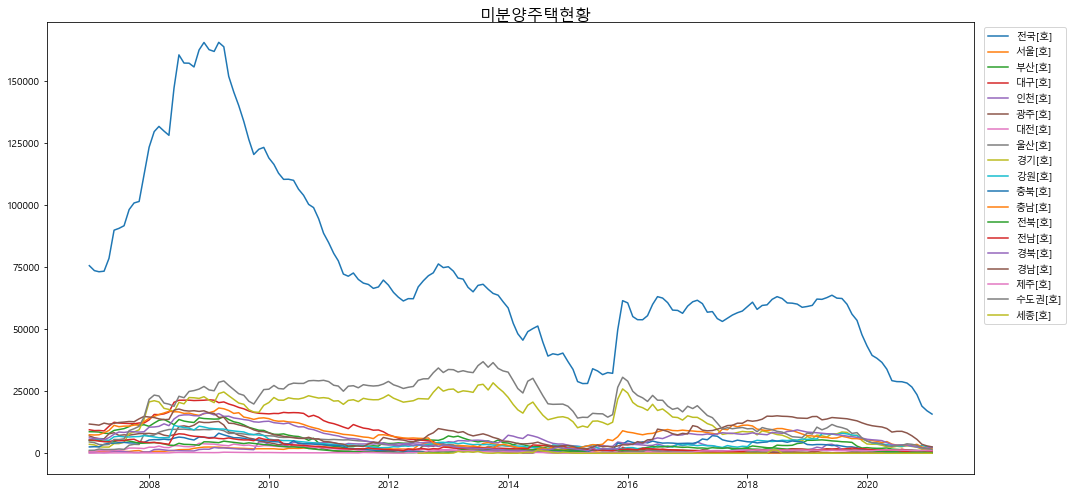

In [26]:
mul_viz(unsold,'미분양주택현황')

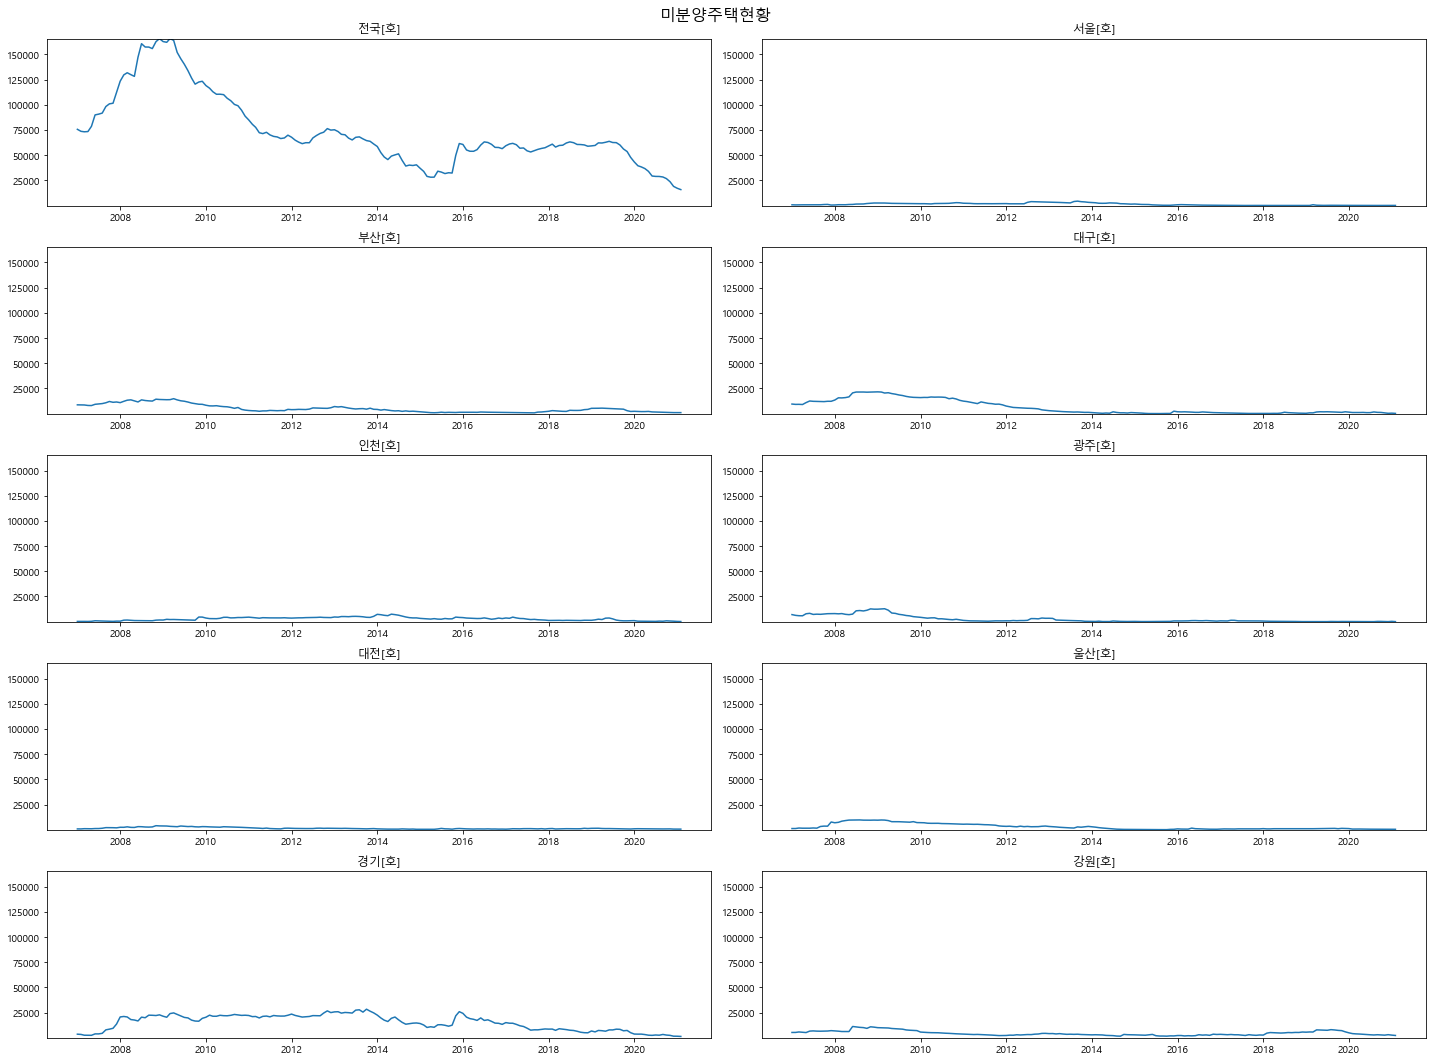

In [77]:
indiv_viz(unsold.iloc[:,:10],(20,15),'미분양주택현황')

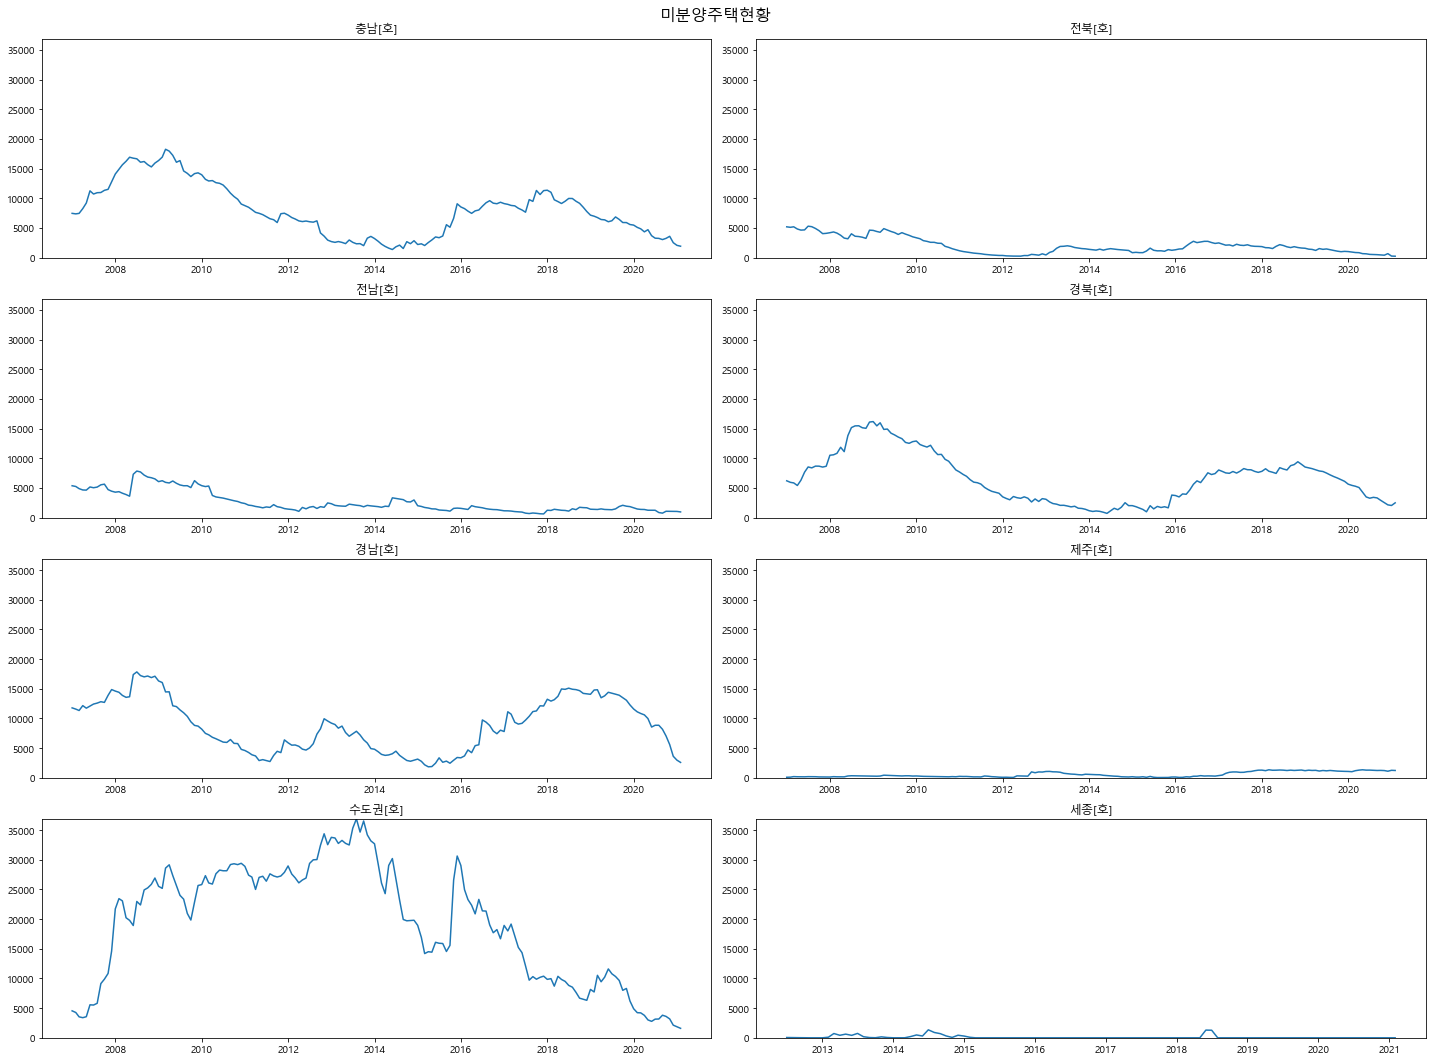

In [81]:
indiv_viz(unsold.iloc[:,11:],(20,15),'미분양주택현황')

### 아파트 실거래 가격지수

In [28]:
realprice=pd.read_csv('data/realestate/아파트 실거래가격지수.csv',parse_dates=True) 
realprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          181 non-null    object 
 1   도심권[2017.11=100]    181 non-null    float64
 2   동북권[2017.11=100]    181 non-null    float64
 3   동남권[2017.11=100]    181 non-null    float64
 4   부산[2017.11=100]     181 non-null    float64
 5   대구[2017.11=100]     181 non-null    float64
 6   인천[2017.11=100]     181 non-null    float64
 7   광주[2017.11=100]     181 non-null    float64
 8   대전[2017.11=100]     181 non-null    float64
 9   울산[2017.11=100]     181 non-null    float64
 10  세종[2017.11=100]     181 non-null    float64
 11  경기[2017.11=100]     181 non-null    float64
 12  강원[2017.11=100]     181 non-null    float64
 13  충북[2017.11=100]     181 non-null    float64
 14  충남[2017.11=100]     181 non-null    float64
 15  서북권[2017.11=100]    181 non-null    float64
 16  서남권[2017

In [29]:
realprice=change_datetime(realprice)

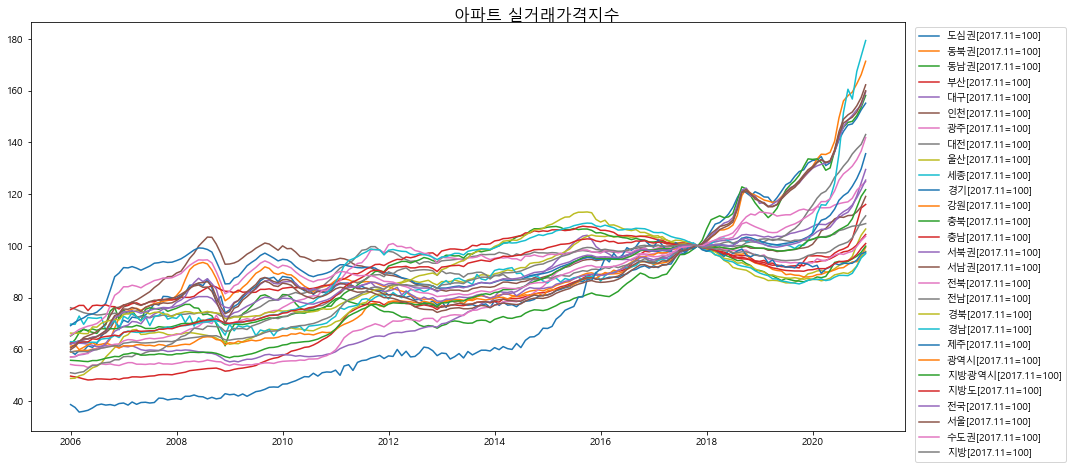

In [30]:
mul_viz(realprice,'아파트 실거래가격지수')

### 유형별 주택 월세 통합 가격지수

In [31]:
typeprice=pd.read_csv('data/realestate/유형별_주택월세통합가격지수.csv',parse_dates=True) 
typeprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 97 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                70 non-null     object 
 1   종합-전국[2017.11=100]        70 non-null     float64
 2   종합-수도권[2017.11=100]       70 non-null     float64
 3   종합-지방[2017.11=100]        70 non-null     float64
 4   종합-5대광역시[2017.11=100]     70 non-null     float64
 5   종합-8개도[2017.11=100]       70 non-null     float64
 6   종합-서울[2017.11=100]        70 non-null     float64
 7   종합-경기[2017.11=100]        70 non-null     float64
 8   종합-인천[2017.11=100]        70 non-null     float64
 9   종합-부산[2017.11=100]        70 non-null     float64
 10  종합-대구[2017.11=100]        70 non-null     float64
 11  종합-광주[2017.11=100]        70 non-null     float64
 12  종합-대전[2017.11=100]        70 non-null     float64
 13  종합-울산[2017.11=100]        0 non-null      float64
 14  종합-세종[2017.1

In [32]:
typeprice.head()

,Unnamed: 0,종합-전국[2017.11=100],종합-수도권[2017.11=100],종합-지방[2017.11=100],종합-5대광역시[2017.11=100],종합-8개도[2017.11=100],종합-서울[2017.11=100],종합-경기[2017.11=100],종합-인천[2017.11=100],종합-부산[2017.11=100],종합-대구[2017.11=100],종합-광주[2017.11=100],종합-대전[2017.11=100],종합-울산[2017.11=100],종합-세종[2017.11=100],종합-강원[2017.11=100],종합-충북[2017.11=100],종합-충남[2017.11=100],종합-전북[2017.11=100],종합-전남[2017.11=100],종합-경북[2017.11=100],종합-경남[2017.11=100],종합-제주[2017.11=100],종합-6대광역시[2017.11=100],종합-9개도[2017.11=100],아파트-전국[2017.11=100],아파트-수도권[2017.11=100],아파트-지방[2017.11=100],아파트-5대광역시[2017.11=100],아파트-8개도[2017.11=100],아파트-서울[2017.11=100],아파트-경기[2017.11=100],아파트-인천[2017.11=100],아파트-부산[2017.11=100],아파트-대구[2017.11=100],아파트-광주[2017.11=100],아파트-대전[2017.11=100],아파트-울산[2017.11=100],아파트-세종[2017.11=100],아파트-강원[2017.11=100],아파트-충북[2017.11=100],아파트-충남[2017.11=100],아파트-전북[2017.11=100],아파트-전남[2017.11=100],아파트-경북[2017.11=100],아파트-경남[2017.11=100],아파트-제주[2017.11=100],아파트-6대광역시[2017.11=100],아파트-9개도[2017.11=100],연립다세대-전국[2017.11=100],연립다세대-수도권[2017.11=100],연립다세대-지방[2017.11=100],연립다세대-5대광역시[2017.11=100],연립다세대-8개도[2017.11=100],연립다세대-서울[2017.11=100],연립다세대-경기[2017.11=100],연립다세대-인천[2017.11=100],연립다세대-부산[2017.11=100],연립다세대-대구[2017.11=100],연립다세대-광주[2017.11=100],연립다세대-대전[2017.11=100],연립다세대-울산[2017.11=100],연립다세대-세종[2017.11=100],연립다세대-강원[2017.11=100],연립다세대-충북[2017.11=100],연립다세대-충남[2017.11=100],연립다세대-전북[2017.11=100],연립다세대-전남[2017.11=100],연립다세대-경북[2017.11=100],연립다세대-경남[2017.11=100],연립다세대-제주[2017.11=100],연립다세대-6대광역시[2017.11=100],연립다세대-9개도[2017.11=100],단독주택-전국[2017.11=100],단독주택-수도권[2017.11=100],단독주택-지방[2017.11=100],단독주택-5대광역시[2017.11=100],단독주택-8개도[2017.11=100],단독주택-서울[2017.11=100],단독주택-경기[2017.11=100],단독주택-인천[2017.11=100],단독주택-부산[2017.11=100],단독주택-대구[2017.11=100],단독주택-광주[2017.11=100],단독주택-대전[2017.11=100],단독주택-울산[2017.11=100],단독주택-세종[2017.11=100],단독주택-강원[2017.11=100],단독주택-충북[2017.11=100],단독주택-충남[2017.11=100],단독주택-전북[2017.11=100],단독주택-전남[2017.11=100],단독주택-경북[2017.11=100],단독주택-경남[2017.11=100],단독주택-제주[2017.11=100],단독주택-6대광역시[2017.11=100],단독주택-9개도[2017.11=100]
0,2015-06-01,100.2,99.6,100.8,100.3,101.0,99.9,99.4,99.1,99.7,100.6,100.2,100.5,NaN,107.6,99.2,101.2,101.2,99.1,100.0,101.7,103.1,98.0,100.0,100.3,100.4,99.5,101.2,100.4,101.8,100.0,99.3,99.0,99.4,101.2,100.5,100.3,101.4,110.5,98.6,101.0,102.7,99.0,99.6,103.3,104.5,97.7,100.1,100.6,99.7,99.5,100.2,100.0,100.4,99.5,99.5,99.1,99.6,99.9,100.4,100.8,101.1,101.5,99.4,101.5,100.7,99.9,100.6,100.8,101.7,97.6,99.6,99.8,100.1,100.0,100.2,100.3,100.1,100.1,100.1,99.9,100.4,99.2,99.4,101.2,102.7,99.5,100.1,101.6,99.4,99.3,100.3,100.2,100.8,98.1,100.2,100.1
1,2015-07-01,100.2,99.6,100.8,100.4,101.0,99.9,99.5,99.2,99.7,100.8,100.2,100.5,NaN,107.6,99.3,101.2,101.2,99.1,100.0,101.7,103.1,98.1,100.1,100.3,100.4,99.5,101.2,100.4,101.8,100.0,99.4,99.0,99.3,101.4,100.5,100.3,101.5,110.4,98.7,101.0,102.7,98.9,99.6,103.3,104.5,97.8,100.1,100.6,99.7,99.5,100.3,100.1,100.4,99.5,99.5,99.3,99.7,100.0,100.2,100.8,101.1,101.5,99.4,101.4,100.8,99.9,100.7,100.8,101.8,97.7,99.7,99.8,100.2,100.0,100.2,100.4,100.2,100.1,100.1,99.9,100.4,99.5,99.4,101.1,102.7,99.5,100.1,101.6,99.4,99.3,100.4,100.3,100.8,98.2,100.3,100.2
2,2015-08-01,100.3,99.6,100.9,100.4,101.0,99.9,99.5,99.2,99.7,101.0,100.3,100.5,NaN,107.5,99.3,101.1,101.3,99.2,100.0,101.8,103.2,98.2,100.1,100.4,100.4,99.6,101.3,100.4,101.8,100.0,99.4,99.0,99.4,101.5,100.5,100.2,101.5,110.2,98.7,101.0,102.8,99.0,99.6,103.5,104.5,98.1,100.1,100.6,99.8,99.5,100.3,100.1,100.5,99.6,99.6,99.3,99.7,100.2,100.0,100.8,101.1,101.6,99.3,101.3,100.9,99.9,100.6,101.0,101.9,97.8,99.7,99.9,100.2,100.0,100.2,100.5,100.2,100.0,100.1,99.9,100.4,99.8,99.4,101.1,102.6,99.6,100.1,101.5,99.6,99.3,100.4,100.3,100.8,98.3,100.4,100.2
3,2015-09-01,100.3,99.7,100.9,100.4,101.1,100.0,99.6,99.2,99.7,101.1,100.3,100.4,NaN,107.5,99.4,101.2,101.4,99.3,99.9,102.0,103.3,98.3,100.2,100.5,100.5,99.7,101.4,100.5,102.0,100.2,99.5,99.0,99.5,101.6,100.5,100.1,101.6,110.3,98.8,101.1,102.9,99.2,99.6,103.7,104.6,98.2,100.2,100.7,99.8,99.6,100.4,100.1,100.6,99.7,99.6,99.3,

In [33]:
typeprice=change_datetime(typeprice)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


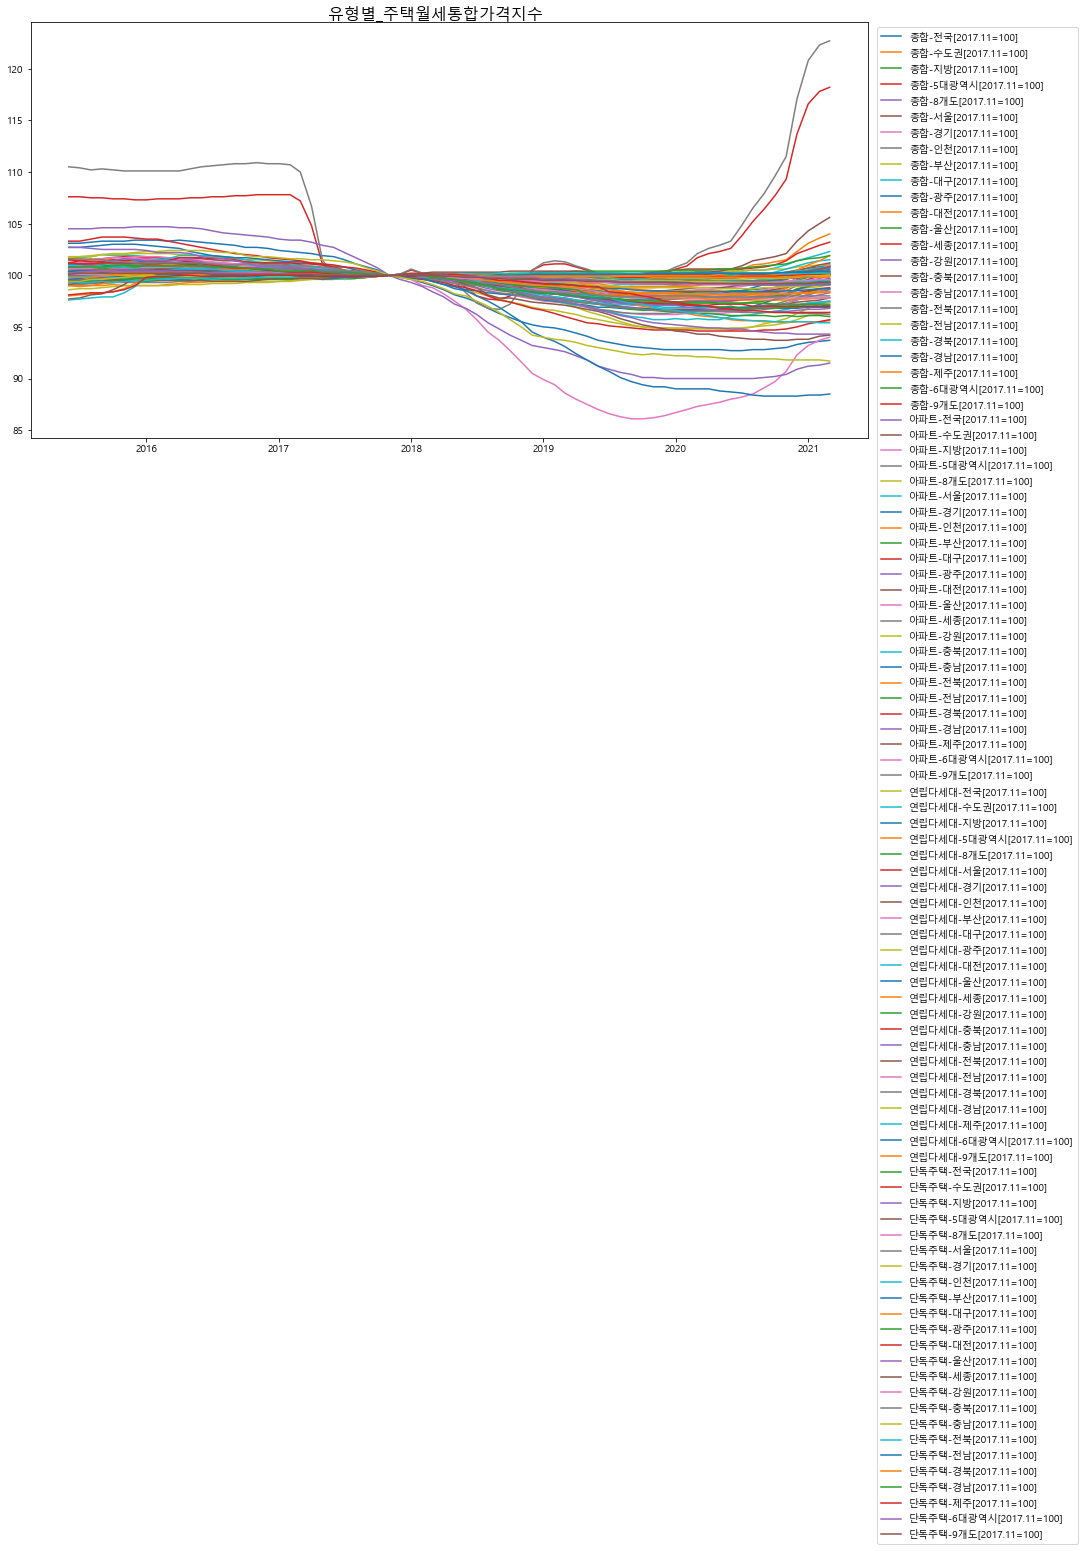

In [34]:
mul_viz(typeprice,'유형별_주택월세통합가격지수')

### 주택건설인허가실적

In [35]:
permit=pd.read_csv('data/realestate/주택건설인허가실적.csv',parse_dates=True) 
permit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  170 non-null    object 
 1   전국[호]       170 non-null    float64
 2   부산[호]       170 non-null    float64
 3   충북[호]       170 non-null    float64
 4   충남[호]       170 non-null    float64
 5   대구[호]       170 non-null    float64
 6   대전[호]       170 non-null    float64
 7   강원[호]       170 non-null    float64
 8   광주[호]       170 non-null    float64
 9   경기[호]       170 non-null    float64
 10  인천[호]       170 non-null    float64
 11  제주[호]       170 non-null    float64
 12  전북[호]       170 non-null    float64
 13  전남[호]       170 non-null    float64
 14  경북[호]       170 non-null    float64
 15  경남[호]       170 non-null    float64
 16  민간부문[호]     170 non-null    float64
 17  공공부문[호]     170 non-null    float64
 18  부문별[호]      170 non-null    float64
 19  세종[호]       103 non-null    f

In [36]:
permit=change_datetime(permit)

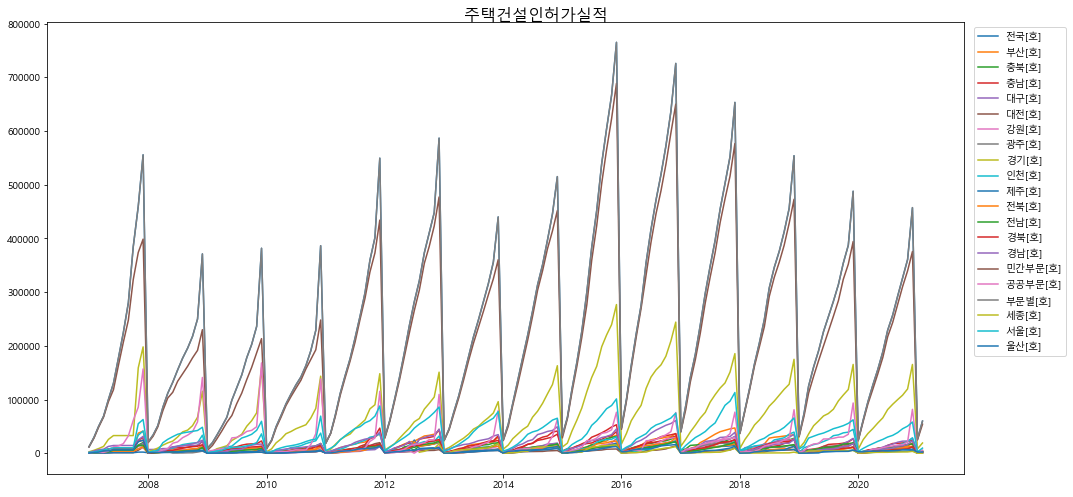

In [37]:
mul_viz(permit,'주택건설인허가실적')

### 주택매매가격지수(KB)

In [38]:
trading=pd.read_csv('data/realestate/주택매매가격지수(KB).csv',parse_dates=True)
trading.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            423 non-null    object 
 1   총지수[2019.01=100]      423 non-null    float64
 2   단독주택[2019.01=100]     423 non-null    float64
 3   연립주택[2019.01=100]     423 non-null    float64
 4   아파트[2019.01=100]      423 non-null    float64
 5   아파트(서울)[2019.01=100]  423 non-null    float64
 6   총지수(서울)[2019.01=100]  423 non-null    float64
dtypes: float64(6), object(1)
memory usage: 23.3+ KB


In [39]:
trading=change_datetime(trading)

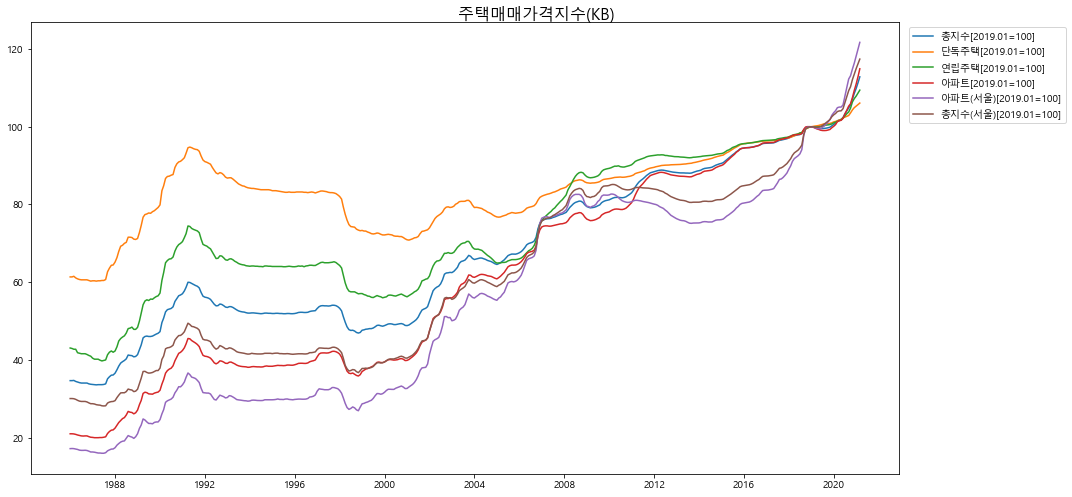

In [40]:
mul_viz(trading,'주택매매가격지수(KB)')

### 주택전세가격지수(KB)

In [41]:
jeonse=pd.read_csv('data/realestate/주택전세가격지수(KB).csv',parse_dates=True) 
jeonse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            423 non-null    object 
 1   총지수[2019.01=100]      423 non-null    float64
 2   단독주택[2019.01=100]     423 non-null    float64
 3   연립주택[2019.01=100]     423 non-null    float64
 4   아파트[2019.01=100]      423 non-null    float64
 5   아파트(서울)[2019.01=100]  423 non-null    float64
 6   총지수(서울)[2019.01=100]  423 non-null    float64
dtypes: float64(6), object(1)
memory usage: 23.3+ KB


In [42]:
jeonse=change_datetime(jeonse)

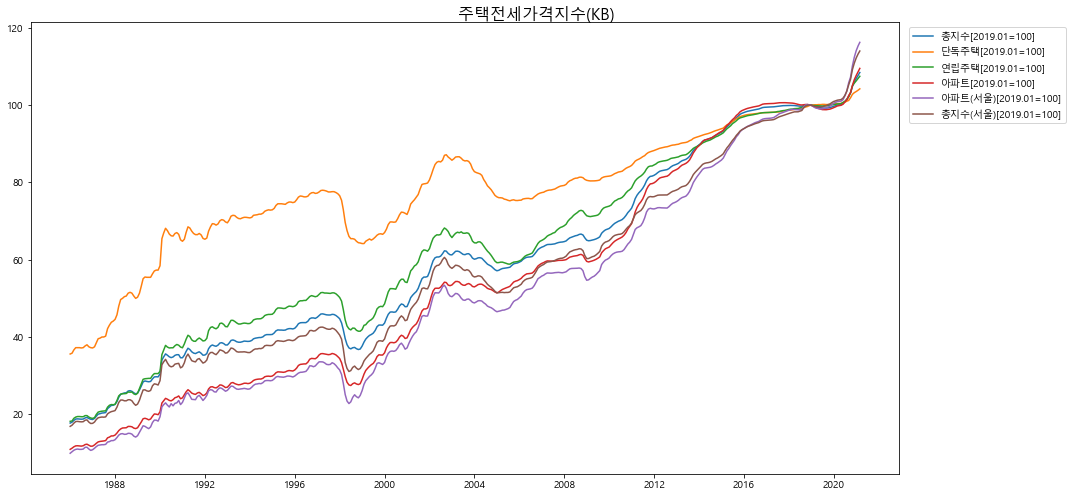

In [43]:
mul_viz(jeonse,'주택전세가격지수(KB)')

### 지역별 지가 변동, 미분양 주택 현황,주택 건설 인허가 실적

In [86]:
permit.shape

(170, 21)

In [92]:
region.head()

,전국[%],서울[%],부산[%],대구[%],인천[%],광주[%],대전[%],울산[%],세종[%],경기[%],강원[%],충북[%],충남[%],전북[%],전남[%],경북[%],경남[%],제주[%]
2005-01-01,0.226,0.192,0.083,0.212,0.145,0.156,0.196,0.137,NaN,0.374,0.142,0.221,0.463,0.108,0.099,0.163,0.140,0.150
2005-02-01,0.184,0.140,0.065,0.208,0.208,0.080,0.206,0.153,NaN,0.256,0.169,0.178,0.531,0.084,0.071,0.135,0.160,0.111
2005-03-01,0.348,0.403,0.119,0.278,0.470,0.154,0.674,0.180,NaN,0.324,0.257,0.227,1.154,0.085,0.139,0.161,0.225,0.102
2005-04-01,0.525,0.725,0.151,0.258,0.751,0.159,0.917,0.149,NaN,0.591,0.221,0.358,0.804,0.071,0.127,0.209,0.291,0.181
2005-05-01,0.562,0.590,0.185,0.254,0.693,0.291,0.850,0.131,NaN,0.882,0.229,0.476,0.883,0.094,0.152,0.224,0.310,0.247


In [88]:
unsold.shape

(170, 19)

In [93]:
result = pd.concat([permit, unsold], axis=1, join="inner")
result.shape

(170, 40)

In [94]:
result.head()

,전국[호],부산[호],충북[호],충남[호],대구[호],대전[호],강원[호],광주[호],경기[호],인천[호],제주[호],전북[호],전남[호],경북[호],경남[호],민간부문[호],공공부문[호],부문별[호],세종[호],서울[호],울산[호],전국[호],서울[호],부산[호],대구[호],인천[호],광주[호],대전[호],울산[호],경기[호],강원[호],충북[호],충남[호],전북[호],전남[호],경북[호],경남[호],제주[호],수도권[호],세종[호]
2007-01-01,12038.0,455.0,188.0,1004.0,818.0,55.0,452.0,1022.0,2647.0,69.0,132.0,888.0,206.0,698.0,1691.0,11718.0,320.0,12038.0,NaN,1530.0,183.0,75616.0,697.0,8680.0,9467.0,243.0,7005.0,819.0,1180.0,3604.0,5312.0,2548.0,7449.0,5179.0,5374.0,6210.0,11772.0,77.0,4544.0,NaN
2007-02-01,29789.0,1554.0,493.0,2310.0,3549.0,89.0,642.0,2200.0,5517.0,185.0,232.0,1490.0,700.0,2942.0,4206.0,28311.0,1478.0,29789.0,NaN,2324.0,1356.0,73619.0,590.0,8653.0,9134.0,312.0,6246.0,803.0,1210.0,3361.0,5344.0,2645.0,7363.0,5098.0,5253.0,5948.0,11563.0,96.0,4263.0,NaN
2007-03-01,49827.0,3675.0,1187.0,4200.0,4596.0,154.0,1031.0,3547.0,8705.0,1115.0,337.0,2153.0,1091.0,5256.0,6527.0,48285.0,1542.0,49827.0,NaN,4212.0,2041.0,73162.0,687.0,8548.0,9189.0,266.0,5905.0,1048.0,1687.0,2579.0,5801.0,2565.0,7446.0,5184.0,4887.0,5854.0,11328.0,188.0,3532.0,NaN
2007-04-01,69013.0,4039.0,1651.0,4901.0,5110.0,235.0,2185.0,3773.0,12692.0,4452.0,485.0,2627.0,2310.0,6480.0,7576.0,67439.0,1574.0,69013.0,NaN,6175.0,4322.0,73393.0,685.0,8074.0,9009.0,219.0,5829.0,1020.0,1521.0,2488.0,5460.0,3632.0,8250.0,4812.0,4664.0,5419.0,12149.0,162.0,3392.0,NaN
2007-05-01,100210.0,4936.0,2331.0,7988.0,5685.0,746.0,2698.0,5844.0,25860.0,4663.0,563.0,3542.0,2663.0,7330.0,12754.0,96172.0,4038.0,100210.0,NaN,8041.0,4566.0,78571.0,704.0,7964.0,10888.0,362.0,7842.0,957.0,1500.0,2488.0,5212.0,4012.0,9195.0,4625.0,4640.0,6303.0,11723.0,156.0,3554.0,NaN
